Step 1: import the required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing import image
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
print(tf.__version__)



Using TensorFlow backend.


1.13.1


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.listdir("E:/MS/Deep Learning/Assignments/Assignment2/JF30-2"))

['classlabels.txt', 'jpg', 'readme.txt', 'trn1.txt', 'trn2.txt', 'trn3.txt', 'tst1.txt', 'tst2.txt', 'tst3.txt', 'val1.txt', 'val2.txt', 'val3.txt']


Step 2 : Load Data and Prepocess it

In [3]:
train = pd.read_csv('E:/MS/Deep Learning/Assignments/Assignment2/JF30-2/classlabels.txt',names=['id','label'])
train.head(5)

,id,label
0,JFT_00001.jpg,1
1,JFT_00002.jpg,1
2,JFT_00003.jpg,1
3,JFT_00004.jpg,1
4,JFT_00006.jpg,1


In [4]:
g = train['label']
df = pd.concat([g.value_counts(),           
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (df)


    counts  percentage
6       70    4.732928
28      68    4.597701
23      67    4.530088
13      66    4.462475
4       66    4.462475
2       65    4.394861
7       64    4.327248
18      63    4.259635
29      63    4.259635
20      61    4.124408
27      61    4.124408
24      60    4.056795
10      60    4.056795
25      56    3.786342
19      55    3.718729
14      54    3.651116
5       54    3.651116
22      49    3.313049
12      48    3.245436
9       46    3.110210
17      45    3.042596
3       41    2.772143
21      38    2.569304
11      36    2.434077
26      35    2.366464
8       28    1.893171
16      24    1.622718
15      13    0.878972
30      12    0.811359
1       11    0.743746


In [5]:
maximum=0
for i in range(0,len(train['label'].value_counts().index)):
    maximum=max(train['label'].value_counts().iloc[i],maximum)
print('Baseline metric is accuracy')
print("The probability of most frequent label type is: ",round(maximum/int(train.shape[0]),4)*100,"%")

Baseline metric is accuracy
The probability of most frequent label type is:  4.73 %


Load the image from the images folder reading the imageid from the classlabels.txt. Load to list and save it to np.array

In [6]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('E:/MS/Deep Learning/Assignments/Assignment2/JF30-2/jpg/'+train['id'][i], target_size=(32,32,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 1479/1479 [02:06<00:00, 11.72it/s]


(736, 1000, 3)


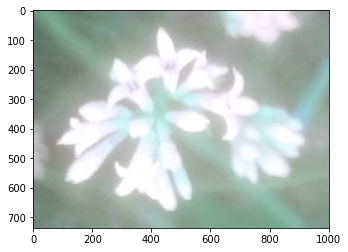

In [7]:
img = cv2.imread('E:/MS/Deep Learning/Assignments/Assignment2/JF30-2/jpg/JFT_00010.jpg')
print(img.shape)
plt.imshow(img);

(32, 32, 3)


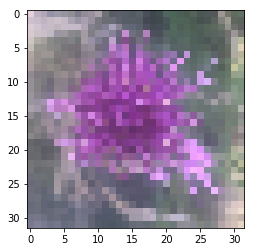

In [8]:
# Grab an image from the dataset
img15 = X[15]
print(img15.shape)
plt.imshow(img15);
#plt.xlabel([y_test[15]])


In [9]:
z= train['id'].values
y=train['label'].values
y = to_categorical(y)
train.head(5)

,id,label
0,JFT_00001.jpg,1
1,JFT_00002.jpg,1
2,JFT_00003.jpg,1
3,JFT_00004.jpg,1
4,JFT_00006.jpg,1


Step 3: Creating a validation set from the training data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

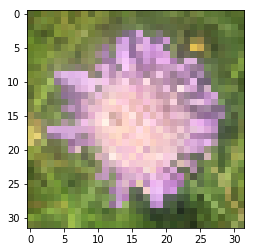

In [11]:
plt.imshow(X_train[234])


In [12]:
X_train.shape

(1183, 32, 32, 3)

In [13]:
X_test.shape

(296, 32, 32, 3)

In [14]:
y_train.shape

(1183, 31)

In [15]:
y_test.shape

(296, 31)

Step 4: Define the model structure.

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(31, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model2 = Sequential()
model2.add(Conv2D(32, (6, 6), padding='same', input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32,(6, 6)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (6, 6), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (6,6)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
# Output classes are 30
model2.add(Dense(31))
model2.add(Activation('softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [19]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        3488      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 32)        36896     
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        36896     
__________

In [20]:
#model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
import time
start_time=time.time
history2 = model2.fit(X_train, y_train, batch_size=128, validation_data = (X_test, y_test), epochs=30)

Train on 1183 samples, validate on 296 samples
Epoch 1/30
1183/1183 [==============================] - ETA: 10s - loss: 0.2091 - acc: 0.95 - ETA: 8s - loss: 0.2425 - acc: 0.9414 - ETA: 7s - loss: 0.2147 - acc: 0.942 - ETA: 6s - loss: 0.2155 - acc: 0.941 - ETA: 4s - loss: 0.2223 - acc: 0.940 - ETA: 3s - loss: 0.2311 - acc: 0.937 - ETA: 2s - loss: 0.2327 - acc: 0.935 - ETA: 1s - loss: 0.2205 - acc: 0.938 - ETA: 0s - loss: 0.2109 - acc: 0.941 - 11s 10ms/step - loss: 0.2156 - acc: 0.9391 - val_loss: 0.4999 - val_acc: 0.8378
Epoch 2/30
1183/1183 [==============================] - ETA: 9s - loss: 0.1292 - acc: 0.945 - ETA: 8s - loss: 0.1930 - acc: 0.918 - ETA: 6s - loss: 0.1775 - acc: 0.927 - ETA: 5s - loss: 0.1850 - acc: 0.921 - ETA: 4s - loss: 0.1974 - acc: 0.918 - ETA: 3s - loss: 0.2050 - acc: 0.916 - ETA: 2s - loss: 0.2357 - acc: 0.902 - ETA: 1s - loss: 0.2477 - acc: 0.903 - ETA: 0s - loss: 0.2337 - acc: 0.909 - 11s 9ms/step - loss: 0.2341 - acc: 0.9112 - val_loss: 0.6813 - val_acc: 0.78

1183/1183 [==============================] - ETA: 8s - loss: 0.1272 - acc: 0.960 - ETA: 7s - loss: 0.1679 - acc: 0.957 - ETA: 6s - loss: 0.1543 - acc: 0.960 - ETA: 5s - loss: 0.1291 - acc: 0.968 - ETA: 4s - loss: 0.1419 - acc: 0.965 - ETA: 3s - loss: 0.1421 - acc: 0.966 - ETA: 2s - loss: 0.1397 - acc: 0.966 - ETA: 1s - loss: 0.1384 - acc: 0.965 - ETA: 0s - loss: 0.1370 - acc: 0.965 - 11s 9ms/step - loss: 0.1370 - acc: 0.9645 - val_loss: 0.5839 - val_acc: 0.8446
Epoch 19/30
1183/1183 [==============================] - ETA: 9s - loss: 0.1123 - acc: 0.960 - ETA: 8s - loss: 0.1347 - acc: 0.960 - ETA: 7s - loss: 0.1296 - acc: 0.958 - ETA: 6s - loss: 0.1110 - acc: 0.964 - ETA: 4s - loss: 0.1045 - acc: 0.968 - ETA: 3s - loss: 0.1031 - acc: 0.970 - ETA: 2s - loss: 0.1077 - acc: 0.966 - ETA: 1s - loss: 0.1054 - acc: 0.964 - ETA: 0s - loss: 0.1035 - acc: 0.967 - 11s 10ms/step - loss: 0.1022 - acc: 0.9670 - val_loss: 0.5815 - val_acc: 0.8041
Epoch 20/30
1183/1183 [==============================] 

In [30]:
scores = model2.evaluate(X_test, y_test, verbose=0)  
print("Accuracy of the model2: %.2f%%" % (scores[1]*100)) 

Accuracy of the model2: 85.81%


Step 5: Training the model.

In [34]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=30)
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 1183 samples, validate on 296 samples
Epoch 1/30
1183/1183 [==============================] - ETA: 4s - loss: 0.0767 - acc: 0.968 - ETA: 4s - loss: 0.0559 - acc: 0.984 - ETA: 4s - loss: 0.0930 - acc: 0.979 - ETA: 4s - loss: 0.0922 - acc: 0.984 - ETA: 4s - loss: 0.1077 - acc: 0.981 - ETA: 4s - loss: 0.1030 - acc: 0.984 - ETA: 4s - loss: 0.0950 - acc: 0.986 - ETA: 4s - loss: 0.1077 - acc: 0.980 - ETA: 4s - loss: 0.1170 - acc: 0.972 - ETA: 4s - loss: 0.1189 - acc: 0.971 - ETA: 3s - loss: 0.1227 - acc: 0.968 - ETA: 3s - loss: 0.1242 - acc: 0.968 - ETA: 3s - loss: 0.1320 - acc: 0.966 - ETA: 3s - loss: 0.1442 - acc: 0.959 - ETA: 3s - loss: 0.1448 - acc: 0.960 - ETA: 3s - loss: 0.1503 - acc: 0.955 - ETA: 2s - loss: 0.1481 - acc: 0.955 - ETA: 2s - loss: 0.1445 - acc: 0.956 - ETA: 2s - loss: 0.1444 - acc: 0.955 - ETA: 2s - loss: 0.1410 - acc: 0.956 - ETA: 2s - loss: 0.1399 - acc: 0.955 - ETA: 2s - loss: 0.1392 - acc: 0.956 - ETA: 2s - loss: 0.1363 - acc: 0.956 - ETA: 1s - loss: 0.1350 

1183/1183 [==============================] - ETA: 5s - loss: 0.1013 - acc: 0.968 - ETA: 5s - loss: 0.0849 - acc: 0.968 - ETA: 4s - loss: 0.1336 - acc: 0.968 - ETA: 4s - loss: 0.1298 - acc: 0.976 - ETA: 4s - loss: 0.1193 - acc: 0.975 - ETA: 4s - loss: 0.1186 - acc: 0.974 - ETA: 4s - loss: 0.1068 - acc: 0.977 - ETA: 4s - loss: 0.1046 - acc: 0.976 - ETA: 4s - loss: 0.0964 - acc: 0.979 - ETA: 3s - loss: 0.0991 - acc: 0.975 - ETA: 3s - loss: 0.1081 - acc: 0.971 - ETA: 3s - loss: 0.1137 - acc: 0.968 - ETA: 3s - loss: 0.1065 - acc: 0.971 - ETA: 3s - loss: 0.1140 - acc: 0.966 - ETA: 3s - loss: 0.1082 - acc: 0.968 - ETA: 3s - loss: 0.1098 - acc: 0.968 - ETA: 2s - loss: 0.1086 - acc: 0.970 - ETA: 2s - loss: 0.1200 - acc: 0.967 - ETA: 2s - loss: 0.1166 - acc: 0.968 - ETA: 2s - loss: 0.1241 - acc: 0.967 - ETA: 2s - loss: 0.1274 - acc: 0.965 - ETA: 2s - loss: 0.1232 - acc: 0.967 - ETA: 2s - loss: 0.1247 - acc: 0.966 - ETA: 1s - loss: 0.1310 - acc: 0.964 - ETA: 1s - loss: 0.1292 - acc: 0.965 - ETA: 

1183/1183 [==============================] - ETA: 5s - loss: 0.0706 - acc: 0.968 - ETA: 4s - loss: 0.0449 - acc: 0.984 - ETA: 4s - loss: 0.0417 - acc: 0.989 - ETA: 4s - loss: 0.0549 - acc: 0.984 - ETA: 4s - loss: 0.0535 - acc: 0.981 - ETA: 4s - loss: 0.0612 - acc: 0.974 - ETA: 4s - loss: 0.0610 - acc: 0.973 - ETA: 4s - loss: 0.0565 - acc: 0.976 - ETA: 4s - loss: 0.0593 - acc: 0.975 - ETA: 3s - loss: 0.0614 - acc: 0.975 - ETA: 3s - loss: 0.0576 - acc: 0.977 - ETA: 3s - loss: 0.0666 - acc: 0.974 - ETA: 3s - loss: 0.0716 - acc: 0.968 - ETA: 3s - loss: 0.0750 - acc: 0.966 - ETA: 3s - loss: 0.0758 - acc: 0.968 - ETA: 3s - loss: 0.0725 - acc: 0.970 - ETA: 2s - loss: 0.0729 - acc: 0.970 - ETA: 2s - loss: 0.0701 - acc: 0.972 - ETA: 2s - loss: 0.0760 - acc: 0.970 - ETA: 2s - loss: 0.0779 - acc: 0.970 - ETA: 2s - loss: 0.0780 - acc: 0.968 - ETA: 2s - loss: 0.0814 - acc: 0.965 - ETA: 2s - loss: 0.0806 - acc: 0.966 - ETA: 1s - loss: 0.0812 - acc: 0.967 - ETA: 1s - loss: 0.0798 - acc: 0.968 - ETA: 

1183/1183 [==============================] - ETA: 5s - loss: 0.1383 - acc: 0.968 - ETA: 5s - loss: 0.0905 - acc: 0.984 - ETA: 4s - loss: 0.0959 - acc: 0.979 - ETA: 4s - loss: 0.0950 - acc: 0.984 - ETA: 4s - loss: 0.0906 - acc: 0.981 - ETA: 4s - loss: 0.0922 - acc: 0.979 - ETA: 4s - loss: 0.0850 - acc: 0.977 - ETA: 4s - loss: 0.0799 - acc: 0.980 - ETA: 4s - loss: 0.0720 - acc: 0.982 - ETA: 3s - loss: 0.0928 - acc: 0.968 - ETA: 3s - loss: 0.0877 - acc: 0.971 - ETA: 3s - loss: 0.0924 - acc: 0.966 - ETA: 3s - loss: 0.1025 - acc: 0.961 - ETA: 3s - loss: 0.1034 - acc: 0.959 - ETA: 3s - loss: 0.1022 - acc: 0.960 - ETA: 3s - loss: 0.1032 - acc: 0.957 - ETA: 2s - loss: 0.1023 - acc: 0.955 - ETA: 2s - loss: 0.1002 - acc: 0.958 - ETA: 2s - loss: 0.0996 - acc: 0.958 - ETA: 2s - loss: 0.0963 - acc: 0.960 - ETA: 2s - loss: 0.0968 - acc: 0.961 - ETA: 2s - loss: 0.0931 - acc: 0.963 - ETA: 2s - loss: 0.0953 - acc: 0.962 - ETA: 1s - loss: 0.0950 - acc: 0.962 - ETA: 1s - loss: 0.0952 - acc: 0.962 - ETA: 

1183/1183 [==============================] - ETA: 5s - loss: 0.2035 - acc: 0.968 - ETA: 4s - loss: 0.1231 - acc: 0.984 - ETA: 4s - loss: 0.1177 - acc: 0.968 - ETA: 4s - loss: 0.1388 - acc: 0.953 - ETA: 4s - loss: 0.1177 - acc: 0.962 - ETA: 4s - loss: 0.1127 - acc: 0.968 - ETA: 4s - loss: 0.1057 - acc: 0.968 - ETA: 4s - loss: 0.1180 - acc: 0.957 - ETA: 3s - loss: 0.1133 - acc: 0.961 - ETA: 3s - loss: 0.1263 - acc: 0.959 - ETA: 3s - loss: 0.1215 - acc: 0.963 - ETA: 3s - loss: 0.1206 - acc: 0.963 - ETA: 3s - loss: 0.1137 - acc: 0.966 - ETA: 3s - loss: 0.1135 - acc: 0.964 - ETA: 3s - loss: 0.1107 - acc: 0.964 - ETA: 2s - loss: 0.1092 - acc: 0.964 - ETA: 2s - loss: 0.1092 - acc: 0.965 - ETA: 2s - loss: 0.1127 - acc: 0.961 - ETA: 2s - loss: 0.1095 - acc: 0.962 - ETA: 2s - loss: 0.1095 - acc: 0.962 - ETA: 2s - loss: 0.1073 - acc: 0.962 - ETA: 2s - loss: 0.1052 - acc: 0.963 - ETA: 1s - loss: 0.1017 - acc: 0.964 - ETA: 1s - loss: 0.1031 - acc: 0.964 - ETA: 1s - loss: 0.1023 - acc: 0.965 - ETA: 

1183/1183 [==============================] - ETA: 4s - loss: 0.1206 - acc: 0.937 - ETA: 4s - loss: 0.0995 - acc: 0.937 - ETA: 4s - loss: 0.0764 - acc: 0.958 - ETA: 4s - loss: 0.0684 - acc: 0.968 - ETA: 4s - loss: 0.0744 - acc: 0.968 - ETA: 4s - loss: 0.0986 - acc: 0.958 - ETA: 4s - loss: 0.0917 - acc: 0.964 - ETA: 4s - loss: 0.0866 - acc: 0.964 - ETA: 3s - loss: 0.0817 - acc: 0.965 - ETA: 3s - loss: 0.0772 - acc: 0.968 - ETA: 3s - loss: 0.0810 - acc: 0.968 - ETA: 3s - loss: 0.0806 - acc: 0.971 - ETA: 3s - loss: 0.0802 - acc: 0.971 - ETA: 3s - loss: 0.0817 - acc: 0.968 - ETA: 3s - loss: 0.0843 - acc: 0.968 - ETA: 2s - loss: 0.0876 - acc: 0.968 - ETA: 2s - loss: 0.0851 - acc: 0.968 - ETA: 2s - loss: 0.0841 - acc: 0.970 - ETA: 2s - loss: 0.0845 - acc: 0.970 - ETA: 2s - loss: 0.0840 - acc: 0.970 - ETA: 2s - loss: 0.0844 - acc: 0.971 - ETA: 2s - loss: 0.0853 - acc: 0.971 - ETA: 1s - loss: 0.0832 - acc: 0.972 - ETA: 1s - loss: 0.0838 - acc: 0.972 - ETA: 1s - loss: 0.0836 - acc: 0.973 - ETA: 

In [35]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)  
print("Accuracy of the model1: %.2f%%" % (scores[1]*100))  

Accuracy of the model1: 90.20%


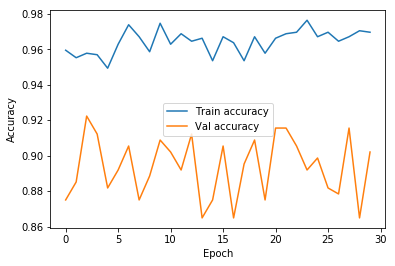

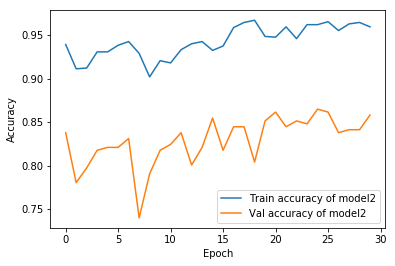

In [36]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val accuracy')
  plt.legend()
  #plt.ylim([0.0005, 1])

plot_history(history)


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train accuracy of model2')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val accuracy of model2')
  plt.legend()
  #plt.ylim([0.0005, 1])

plot_history(history2)

In [37]:
history.history

{'val_loss': [0.31103549293569616,
  0.30968625400517436,
  0.2883322110047212,
  0.2831198057612857,
  0.3468741480563138,
  0.33326119023400386,
  0.3039106066162522,
  0.3986726620712796,
  0.3020228799935934,
  0.2821941633482237,
  0.291128051442069,
  0.34434366709477193,
  0.29776545191133347,
  0.40682151913642883,
  0.4488815326948424,
  0.3124716048305099,
  0.36801428810970205,
  0.3735829072224127,
  0.33052071767884333,
  0.39728621856586355,
  0.29788600874913707,
  0.2931406691267684,
  0.34409852124549245,
  0.3758097427922326,
  0.32823940225549647,
  0.3691286815179361,
  0.3569945024477469,
  0.32758158062760895,
  0.450460588207116,
  0.33336539234261253],
 'val_acc': [0.875,
  0.8851351351351351,
  0.9222972972972973,
  0.9121621621621622,
  0.8817567567567568,
  0.8918918918918919,
  0.9054054054054054,
  0.875,
  0.8885135135135135,
  0.9087837837837838,
  0.902027027027027,
  0.8918918918918919,
  0.9121621621621622,
  0.8648648648648649,
  0.875,
  0.9054054054

In [38]:
predictions = model.predict(X_test)

In [39]:
predictions[0]

array([5.36823944e-15, 5.41138789e-14, 6.73754253e-16, 3.64720399e-05,
       9.99572814e-01, 6.64744892e-16, 1.64709107e-10, 1.76440178e-08,
       6.25765512e-14, 6.36185101e-14, 3.67942947e-14, 1.38711065e-11,
       3.06905862e-10, 6.25778942e-17, 2.56775962e-10, 1.85622199e-12,
       3.67975083e-15, 1.22132256e-18, 5.59319369e-14, 8.77903063e-17,
       7.14921377e-16, 2.02912886e-07, 5.83146248e-05, 5.07434891e-07,
       1.29467377e-15, 7.57996740e-15, 2.02486852e-16, 3.31706484e-04,
       2.08664995e-18, 5.56325656e-13, 1.34559655e-10], dtype=float32)

In [40]:
print(predictions)

[[5.36823944e-15 5.41138789e-14 6.73754253e-16 ... 2.08664995e-18
  5.56325656e-13 1.34559655e-10]
 [1.14139764e-08 4.18521864e-07 3.64874033e-08 ... 8.78615618e-01
  2.83265891e-08 6.93960089e-08]
 [1.88166455e-14 5.12340215e-09 1.19692193e-13 ... 3.54073188e-19
  2.12578327e-12 1.62308899e-11]
 ...
 [1.93210514e-09 3.60961501e-08 3.13822235e-09 ... 1.93724677e-03
  5.19367340e-08 3.51757978e-09]
 [2.15261012e-12 1.37004835e-11 6.64073223e-12 ... 1.24681801e-14
  1.07945729e-10 9.07503647e-07]
 [2.72089192e-18 1.58228364e-09 3.70193791e-16 ... 1.54986122e-08
  7.69403985e-10 5.74263355e-21]]


(32, 32, 3)
(1, 32, 32, 3)
7


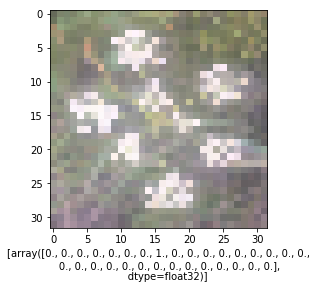

In [41]:
# Grab an image from the test dataset
img = X_test[15]
print(img.shape)
plt.imshow(img);
plt.xlabel([y_test[15]])
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(np.argmax(predictions_single))


In [42]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

7


In [48]:
img = X_test[15]


7


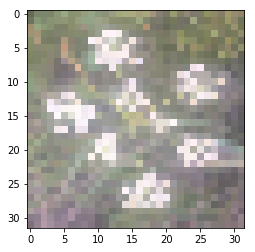

In [52]:
proba = model.predict(img.reshape(1,32,32,3))
print(np.argmax(proba[0]))
  
plt.imshow(img)


Fine Tuning using VGG model

In [53]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=X_train.shape[1:])

In [54]:
#Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

#Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000026E5E7DBB38> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E7DB3C8> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E7DB6A0> False
<keras.layers.pooling.MaxPooling2D object at 0x0000026E5E7C0438> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E7CF198> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E815CC0> False
<keras.layers.pooling.MaxPooling2D object at 0x0000026E5E844550> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E8444E0> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E874780> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E8917B8> False
<keras.layers.pooling.MaxPooling2D object at 0x0000026E5E8C14E0> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E8C1668> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E8DE9E8> False
<keras.layers.convolutional.Conv2D object at 0x0000026E5E912208> False
<ker

In [55]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
modelvgg = models.Sequential()
 
# Add the vgg convolutional base model
modelvgg.add(vgg_conv)
 
# Add new layers
modelvgg.add(layers.Flatten())
modelvgg.add(layers.Dense(1024, activation='relu'))
modelvgg.add(layers.Dropout(0.5))
modelvgg.add(layers.Dense(31, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
modelvgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 31)                31775     
Total params: 15,271,775
Trainable params: 7,636,511
Non-trainable params: 7,635,264
_________________________________________________________________


In [60]:
# Compile the model
modelvgg.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
historyvgg = modelvgg.fit(X_train, y_train, batch_size=512, validation_data = (X_test, y_test), epochs=5)
'''model.fit_generator(
      X_train,
      steps_per_epoch=X_train.samples/X_train.batch_size ,
      epochs=30,
      validation_data=X_train,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)'''
 
# Save the model
modelvgg.save('small_last4.h5')

Train on 1183 samples, validate on 296 samples
Epoch 1/5
1183/1183 [==============================] - ETA: 17s - loss: 0.0526 - acc: 0.98 - ETA: 3s - loss: 2.0970 - acc: 0.7656 - 33s 28ms/step - loss: 2.1004 - acc: 0.7473 - val_loss: 0.9689 - val_acc: 0.7331
Epoch 2/5
1183/1183 [==============================] - ETA: 14s - loss: 0.7655 - acc: 0.78 - ETA: 3s - loss: 0.4884 - acc: 0.8604 - 31s 26ms/step - loss: 0.4308 - acc: 0.8783 - val_loss: 0.3580 - val_acc: 0.8851
Epoch 3/5
1183/1183 [==============================] - ETA: 14s - loss: 0.0793 - acc: 0.98 - ETA: 3s - loss: 0.0664 - acc: 0.9814 - 29s 25ms/step - loss: 0.0645 - acc: 0.9822 - val_loss: 0.4158 - val_acc: 0.8818
Epoch 4/5
1183/1183 [==============================] - ETA: 14s - loss: 0.0460 - acc: 0.98 - ETA: 3s - loss: 0.0533 - acc: 0.9854 - 30s 25ms/step - loss: 0.0497 - acc: 0.9873 - val_loss: 0.3936 - val_acc: 0.8851
Epoch 5/5
1183/1183 [==============================] - ETA: 14s - loss: 0.0412 - acc: 0.98 - ETA: 3s - lo

In [61]:
# Model evaluation
scores = modelvgg.evaluate(X_test, y_test, verbose=0)  
print("Accuracy of the modelvgg: %.2f%%" % (scores[1]*100))  

Accuracy of the modelvgg: 88.18%


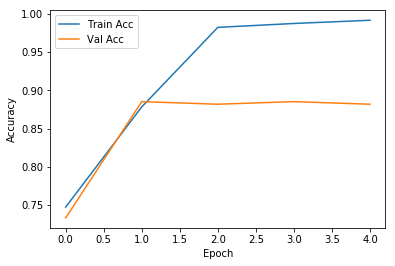

In [62]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(history.epoch, np.array(history.history['acc']),
             label='Train Acc')
    plt.plot(history.epoch, np.array(history.history['val_acc']),
             label = 'Val Acc')
    plt.legend()
  #plt.ylim([0, 5])

plot_history(historyvgg)

Fine Tuning with VGA model helps increase the acccuracy to 88.18% of the model with less number of epochs.
Basic CNN model has generated an accuracy of 90 which is built on 2 CNN layers
CNN model with 4 layers has made an accuracy of 85.